# Episode 04: utilities wrap up

Checking the board visually is fine for debugging but it does not work well when it comes to test a lot of board solutions.

This episode provides some utilities for the POC to come. The goal is to have reasonably efficient classes but not spend too much time on this step.

**Goals for this episode:**
- Answer recurring questions 
    - What are the width, height, nulber of cellss of the puzzle 
    - Given a board is it completed ? 
    - Does it break the clues ?
    - Are they cells left undefined ? 
    - Am I close to the goal ?


# 1. Elements from episodes 01, 02 and 03

TODO

Requirements listed in Episode 02 still uncovered
- a game engine which provides the game validation for try-and-error validation and solved board - for all kind of puzzles (we have tested 2x2 only)
- some operation thate were identified in episode 01: is the board completed, is the board valid
- a puzzle class with some operations to transform the clues and compute black count and cels count
- try-and-error and learning process will require something in between not done and done in order to improve on residual error or rewards: number of cells completed/undefined, number of errors, number of valid cells


# 2. Experiments

# 5. Wrap up

WThe class and solutions are saved in episode04.py.


## 5.1. Quick test of saved classes

In [1]:
# reset all variables from tests
%reset -f

classes implementatation [samples.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/samples.py)

classes implementatation [puzzle.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/puzzle.py)

classes implementatation [board.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/board.py)

classes implementatation [gameengine.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/gameengine.py)

classes implementatation [boardplotter.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/boardplotter.py)

In [2]:
from episode04.samples import clues2x2, clues5x5s, solution2x2, solution5x5s
from episode04.puzzle import Puzzle
from episode04.board import Board, BoardMark
from episode04.gameengine import NonoGameEngine, SolvedNonoGameEngine

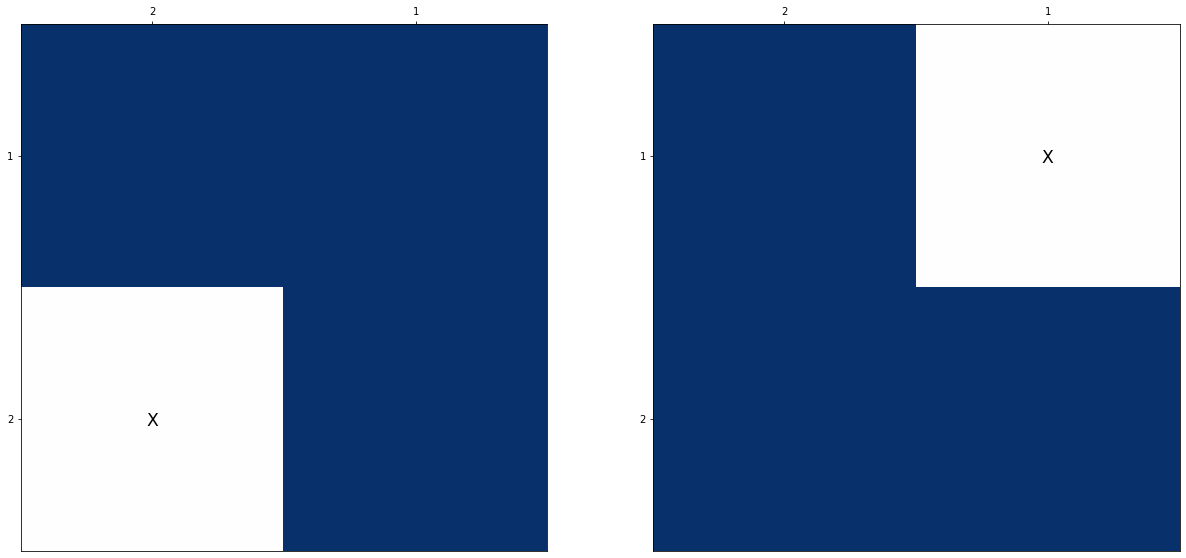

In [3]:
# no solution provided
puzzle2x2 = Puzzle(clues2x2)
assert puzzle2x2.is_consistent()

game2x2 = NonoGameEngine(puzzle2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

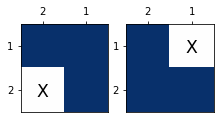

In [4]:
# with solution
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

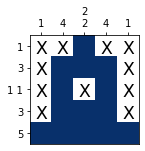

In [7]:
# submit 5x5s
puzzle5x5s = Puzzle(clues5x5s)
assert puzzle5x5s.is_consistent()

game5x5s = NonoGameEngine(puzzle5x5s)

game5x5s.submit(solution5x5s.reshape(puzzle5x5s.cells_count).tolist())
assert game5x5s.is_solved()

game5x5s.show()

In [6]:
print('okay')

okay


TODO doc clean up an refactoring

Type annotations and associated type cheks

interesting resources https://cjolowicz.github.io/posts/hypermodern-python-04-typing/

Documentation and doc check

more lint options 
    "flake8-bandit", "flake8-black", "flake8-bugbear", "flake8-import-order")
https://pypi.org/project/flake8-black/

introduce select one by one
ANN,B,B9,BLK,C,E,F,I,S,W
ANN annotations
B
B9 Black (MIT)
BLK Black (MIT)
C
E
F
I
S
W

a documenter en 01

import in alphabetioc order
build in first 